In [53]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [55]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [56]:
df=pd.read_json('dfObs_v01.json');
df=df.sort_index();
len(df)
df.drop(['Unnamed: 0'],axis=1,inplace=True);

In [57]:
df.head()

,sents,chapter,entities,chunks,label
0,Chapter 1,1.0,[],[Chapter],0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1.0,[],"[the distinction, the first motion, the second or proper motions, the proper motions, the second inequality]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1.0,[],"[The testimony, the ages, the motions, the planets]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1.0,[],"[Reason, experience, their gyrations, perfect circles]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1.0,[],"[figures, it, circles, bodies, the heavens]",0


In [58]:
df.tail()

,sents,chapter,entities,chunks,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"[('Mars', 'PLAN'), ('opposition', 'ASTR'), ('Mars', 'PLAN'), ('Earth', 'PLAN'), ('Sun', 'PLAN'), ('17 hours 20 minutes', 'TIME'), ('Mars', 'PLAN'), ('eastward', 'ASTR'), ('Sun', 'PLAN')]","[the position, Mars, opposition, Kepler, the angular distance, Mars, Earth, the place, 17 hours, Mars]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"[('longitude', 'ASTR'), ('Mars', 'PLAN'), ('opposition', 'ASTR'), ('198° 37\' 50""', 'LONG'), ('Mars', 'PLAN'), ('orbit', 'ASTR'), ('198° 37\' 10""', 'LONG'), ('18° 37\' 10"" Libra', 'LONG')]","[Kepler, the longitude, Mars, opposition, 198°, he, order, Mars's orbit, he, 198°, ' 10"" Libra]",1
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"[('Sun', 'PLAN'), ('longitude', 'ASTR'), ('observation', 'ASTR'), ('Mars', 'PLAN')]","[The Sun, its longitude, the time, observation, its position, Mars]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"[('opposition', 'ASTR'), ('17 hours 20 minutes', 'TIME'), ('March 29', 'DATE'), ('observation', 'ASTR')]","[the time, opposition, 17 hours, March, the time, the observation]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"[('opposition', 'ASTR'), ('March 28', 'DATE'), ('4h 23m', 'TIME')]","[Kepler, the time, opposition, March, 23m AM, old style]",1


In [59]:
X = list(df["sents"])

In [60]:
y = np.array(list(df["label"]))

# Distribution of Samples 

In [61]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [62]:
count

{0: 6264, 1: 435}

Text(0.5, 1.0, 'Distribution of samples over different classes')

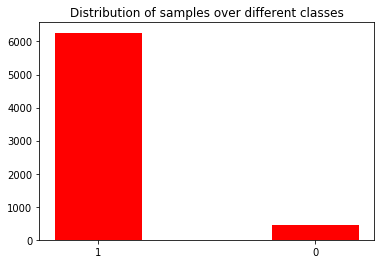

In [63]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [64]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier

## Models

In [65]:
#-Random Forest Classifier
trial= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ))])
####################################################
## 01-Random Forest Classifier with weights
class_weight = dict({0:.0069, 1:700000})
trial_01= Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', RandomForestClassifier(n_estimators=1000, random_state=0 ,class_weight=class_weight))])
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     ('clf', XGBClassifier())])


In [66]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [67]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.25, random_state=42)  

## 1- Random Forest 

In [68]:
trial.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabular...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [69]:
y_pred=trial.predict(X_test)

In [70]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[1553    2]
 [ 113    7]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1555
           1       0.78      0.06      0.11       120

    accuracy                           0.93      1675
   macro avg       0.85      0.53      0.54      1675
weighted avg       0.92      0.93      0.90      1675



In [71]:
cross_validation_accuracy(trial,X,y,cv=10)

[0.9314456  0.93442623 0.93591654 0.93591654 0.93432836 0.93572496
 0.93721973 0.93721973 0.9387145  0.93721973]
Accuracy of : 0.936 ± 0.004


In [72]:
y_pred = cross_val_predict(trial, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      6264
           1       0.57      0.05      0.09       435

    accuracy                           0.94      6699
   macro avg       0.75      0.52      0.53      6699
weighted avg       0.91      0.94      0.91      6699



In [73]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


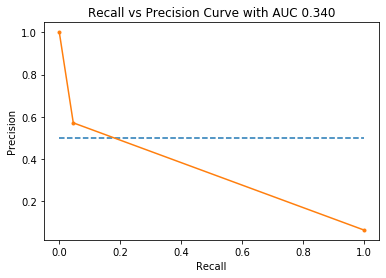

AUC: 0.340


In [74]:
plot_pr(recall, precision)

## 1-Random Forest with using weight

In [75]:
trial_01.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabular...
                 RandomForestClassifier(bootstrap=True,
                                        class_weight={0: 0.0069, 1: 700000},
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
       

In [76]:
y_pred=trial_01.predict(X_test)

In [77]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
#Color_Confusion_Matrix(y, y_test, y_pred)


[[990 565]
 [ 33  87]]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      1555
           1       0.13      0.72      0.23       120

    accuracy                           0.64      1675
   macro avg       0.55      0.68      0.50      1675
weighted avg       0.91      0.64      0.73      1675



In [78]:
cross_validation_accuracy(trial_01,X,y,cv=10)

[0.60506706 0.585693   0.60655738 0.64232489 0.62089552 0.62182362
 0.60687593 0.59940209 0.59043348 0.64573991]
Accuracy of : 0.612 ± 0.038


In [79]:
y_pred = cross_val_predict(trial_01, X, y, cv=10)
cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
#Color_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

              precision    recall  f1-score   support

           0       0.98      0.60      0.74      6264
           1       0.12      0.82      0.22       435

    accuracy                           0.61      6699
   macro avg       0.55      0.71      0.48      6699
weighted avg       0.92      0.61      0.71      6699



In [80]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


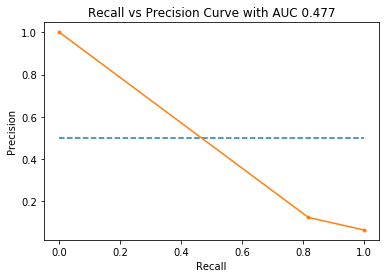

AUC: 0.477


In [81]:
plot_pr(recall, precision)